<html>
    <h1> Supervised Learning - Classification - Naive Bayesian - Gaussian
        </h1>
        <p> <b> Min Khant Soe</b> </p>
        <p> ID: 122277 </p>
        <p> ^_^ </p>
    </html>

<html>
    <p> </p>
    <p> 1. Generating a 2 class data using sklearn. </p>
    </html>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

(1000, 20) (1000,)
(600, 20) (400, 20) (600,) (400,)


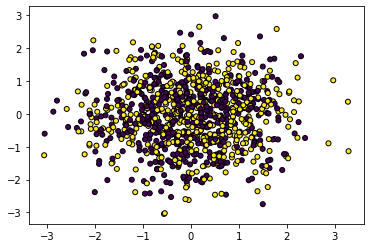

In [77]:
X,y = make_classification(n_samples = 1000, n_features = 20, random_state = 14)
print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,1], marker = 'o', c = y, s = 25, edgecolor = 'k')

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [78]:
print(np.unique(y_train).shape, len(np.unique(y_train)))

(2,) 2


<html>
    <p> </p>
    <p> 2. Putting Gaussian Naive Classification into class
    </html>

In [79]:
class  Gaussian_Naive_Classification():
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        self.k = len(self.classes)
        self.n = X_train.shape[1]
        
        self.mean, self.std = self.mean_std(X_train, y_train)
        assert self.mean.shape == (self.k, self.n),  "mean.shape is not equal to (k,n)"
        assert self.std.shape == (self.k, self.n),  "std.shape is not equal to (k,n)"
        
        m = {}
        m_summation = 0
        for i in self.classes:
            m[i] = len(X_train[y_train == i])
            m_summation += m[i]
        
        self.prior = {}
        prior_summation = 0
        for i in self.classes:
            self.prior[i] = m[i] / m_summation
            prior_summation += self.prior[i]
        assert prior_summation == 1, "sum of probability not equal to 1"
        
    def mean_std(self, X, y):
        mean = np.zeros((self.k, self.n))
        std = np.zeros((self.k, self.n))
        for label in range(self.k):
            mean[label, :] = X[y==label].mean(axis=0)
            std[label, :]  = X[y==label].std(axis=0)
        return mean, std
    
    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
    
    def y_hat(self, X_test):
        posterior = np.zeros((X_test.shape[0], self.k))
        for i, label in enumerate(self.classes):
                likelihood = self.gaussian_pdf(X_test, self.mean[i, :], self.std[i, :])
                assert likelihood.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf!"
                total_likelihood = np.prod(likelihood, axis=1)
                posterior[:, i] = self.prior[label] * total_likelihood
        yhat = np.argmax(posterior, axis = 1)
        return yhat 
            

In [80]:
model = Gaussian_Naive_Classification()
model.fit(X_train, y_train)
yhat = model.y_hat(X_test)
print(yhat.shape)

(400,)


<html>
    <p> </p>
    <p> 3. Fitting the model on the data then calculate accuracy accordingly.
    </html>

In [81]:
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.8239691880454906
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.85      0.89      0.87       201
           1       0.88      0.84      0.86       199

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

